In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.model_selection import train_test_split , cross_val_score , KFold

In [ ]:
data = pd.read_csv('Student_Performance.csv')
data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


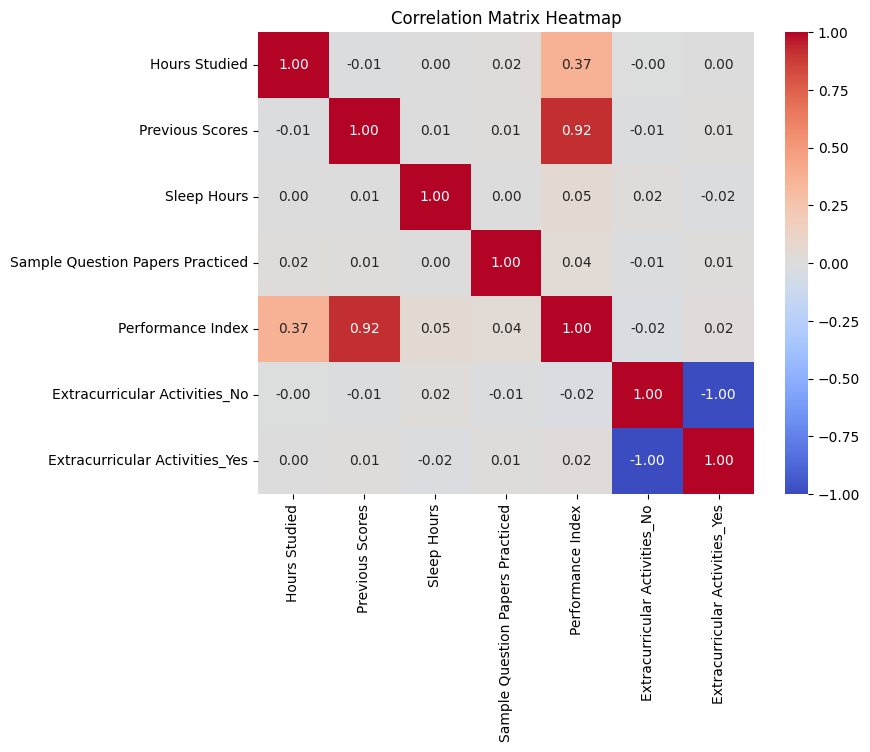

In [22]:
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
# First if no null value in set
pd.isnull(data)
# Then check if no NaN
pd.notnull(data)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
9995,True,True,True,True,True,True
9996,True,True,True,True,True,True
9997,True,True,True,True,True,True
9998,True,True,True,True,True,True


In [7]:
pd.notna(data)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
9995,True,True,True,True,True,True
9996,True,True,True,True,True,True
9997,True,True,True,True,True,True
9998,True,True,True,True,True,True


In [14]:
data = pd.get_dummies(data,columns=['Extracurricular Activities'],dtype=int)
data

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0
...,...,...,...,...,...,...,...
9995,1,49,4,2,23.0,0,1
9996,7,64,8,5,58.0,0,1
9997,6,83,8,5,74.0,0,1
9998,9,97,7,0,95.0,0,1


In [16]:
data_X = data[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Extracurricular Activities_No','Extracurricular Activities_Yes']]
data_Y = data['Performance Index']
data_X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,0,1
1,4,82,4,2,1,0
2,8,51,7,2,0,1
3,5,52,5,2,0,1
4,7,75,8,5,1,0
...,...,...,...,...,...,...
9995,1,49,4,2,0,1
9996,7,64,8,5,0,1
9997,6,83,8,5,0,1
9998,9,97,7,0,0,1


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(data_X,data_Y,train_size=0.7,random_state=42)


6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
8014    32.0
1074    40.0
3063    33.0
6487    69.0
4705    29.0
Name: Performance Index, Length: 3000, dtype: float64

In [21]:
model = LinearRegression()

In [23]:
kfold = KFold(n_splits=5,shuffle=True)
cross_val_res = cross_val_score(model,x_train,y_train,cv=kfold)
for i, result in enumerate(cross_val_res, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_res.mean()* 100:.2f}%')

  Fold 1: 98.91%
  Fold 2: 98.83%
  Fold 3: 98.86%
  Fold 4: 98.81%
  Fold 5: 98.89%
Mean Accuracy: 98.86%


In [24]:
final_model = LinearRegression()
final_model.fit(x_train,y_train)

LinearRegression()

In [25]:
answer = final_model.score(x_test,y_test)
answer

0.9890110607021136

In [31]:
from sklearn.metrics import root_mean_squared_error , r2_score , mean_squared_error
RMSE = root_mean_squared_error(y_test,final_model.predict(x_test))
R2  = r2_score(y_test,final_model.predict(x_test))
MSE = mean_squared_error(y_test,final_model.predict(x_test))
print(f'RMSE : {RMSE}')
print(f'R2 : {R2}')
print(f'MSE : {MSE}')

RMSE : 2.016572295776349
R2 : 0.9890110607021136
MSE : 4.066563824092695
